# Red Wine Quality EDA & Classification   


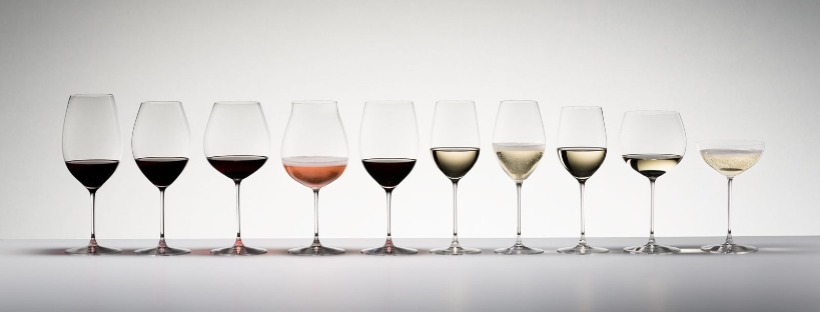


1. [Libraries and Utilities](#1)
2. [Load and Check Data](#2)
3. [Descriptive Statistics](#3)
4. [Missing Values](#4)
5. [Exploratory Data Analysis](#5)
    * [Quality - Fixed Acidity - Density](#6)
    * [Quality](#7)
    * [Fixed Acidity - Volatile Acidity - Citric Acid - Residual Sugar](#8)
    * [Chlorides - Free Sulfur Dioxide - Total Sulfur Dioxide - Density](#9)
    * [pH - Sulphates - Alcohol](#10)
    * [Pairwise Relationships](#11)
    * [Correlation Map](#12)
6. [Outlier Detection](#13)
7. [Feature Engineering](#14)
    * [Label Encoding](#15)
8. [Preprocessing](#16)
    * [Train Test Split](#17)
    * [Standardization](#18)
9. [Models](#19)
    * [Stochastic Gradient Descent](#20)
    * [Hyperparameter Tuning - Grid Search - Cross Validation](#22)
    * [Ensemble Modeling](#23)

<a id = "1"></a>
# Libraries and Utilities

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from collections import Counter

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id = "2"></a>
# Load and Check Data

In [ ]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

In [ ]:
df.shape

<a id = "3"></a>
# Descriptive Statistics

In [ ]:
describe = df.describe()
describe.T

<a id = "4"></a>
# Missing Values

In [ ]:
df.isnull().sum()

<a id = "5"></a>
# Exploratory Data Analysis
<a id = "6"></a>
## Quality - Fixed Acidity - Density

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "Set1")
plt.title("Quality - Fixed Acidity - Density", size = 12)
plt.show()

<a id = "7"></a>
## Quality

In [ ]:
quality = df["quality"].value_counts()

fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid((2,2),(0,0))

plt.pie(x= quality, autopct="%.2f%%", labels=quality.keys(), pctdistance=0.6)
plt.title('Quality', size = 14)
plt.show()

<a id = "8"></a>
## Fixed Acidity - Volatile Acidity - Citric Acid - Residual Sugar

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "9"></a>
## Chlorides - Free Sulfur Dioxide - Total Sulfur Dioxide - Density

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "10"></a>
## pH - Sulphates - Alcohol

In [ ]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "11"></a>
## Pairwise Relationships

In [ ]:
plt.figure()
sns.pairplot(df,hue = 'quality', palette = "Set1")
plt.show()

<a id = "12"></a>
## Correlation Map

In [ ]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,cmap = 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

<a id = "13"></a>
# Outlier Detection

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

df.loc[detect_outliers(df,df.columns[:-1])]

In [ ]:
df = df.drop(detect_outliers(df,df.columns[:-1]),axis = 0).reset_index(drop = True)
df.shape

<a id = "14"></a>
# Feature Engineering

In [ ]:
bins = (2, 6.5, 8)

group_names = ['bad', 'good']

df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

<a id = "15"></a>
## Label Encoding

In [ ]:
label_quality = LabelEncoder()

df['quality'] = label_quality.fit_transform(df['quality'])

df.head()

<a id = "16"></a>
# Preprocessing
<a id = "17"></a>
## Train Test Split

In [ ]:
x = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

<a id = "18"></a>
## Standardization

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<a id = "19"></a>
# Models

- Stochastic Gradient Descent Classifier
- Decision Tree Classifier
- Support Vector Classifier
- Random Forest Classifier
- Logistic Regression Classifier
- K Neighbors Classifier

<a id = "20"></a>
## Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(penalty=None)

sgd.fit(X_train, Y_train)

pred_sgd = sgd.predict(X_test)

print(classification_report(Y_test, pred_sgd))

In [ ]:
cm = confusion_matrix(Y_test, pred_sgd)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

<a id = "22"></a>
## Hyperparameter Tuning - Grid Search - Cross Validation

In [ ]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             SGDClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
sgdc_param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid]

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
best_estimators

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "Models":["DecisionTreeClassifier", "SVC","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier",
             "SGDClassifier"]})
plt.figure(figsize = (10,6))
g = sns.barplot("Cross Validation Means", "Models", data = cv_results, palette = "Paired")
g.set_title("Cross Validation Scores", size = 14)
g.set_xlabel("Mean Accuracy")
plt.show()

<a id = "23"></a>
## Ensemble Modeling

In [ ]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                        ("rfc",best_estimators[2]),
                                        ("knn",best_estimators[4])])

votingC = votingC.fit(X_train, Y_train)

voting_pred = votingC.predict(X_test)

print(classification_report(Y_test, voting_pred))

In [ ]:
cm = confusion_matrix(Y_test, voting_pred)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()